In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# Output File(CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [5]:
c_data_list = []
units = "imperial"
city_id = 0

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    
    try:
        c_data_list.append({"City_ID" : city_id,
                            "City" : city,
                            "Cloudiness" : response["clouds"]["all"],
                            "Country" : response["sys"]["country"],
                            "Date" : response["dt"],
                            "Humidity" : response["main"]["humidity"],
                            "Lat" : response["coord"]["lat"],
                            "Lng" : response["coord"]["lon"],
                            "Max Temp" : response["main"]["temp_max"],
                            "Wind Speed" : response["wind"]["speed"]})
        city_id += 1
        
    except KeyError:
        pass


In [6]:
cities_df = pd.DataFrame(c_data_list)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,nizhnyaya omka,28,RU,1598326168,85,55.43,74.94,55.11,8.43
1,1,neyshabur,0,IR,1598326168,49,36.21,58.80,63.86,2.19
2,2,kangaatsiaq,100,GL,1598326168,90,68.31,-53.46,44.06,5.03
3,3,merauke,52,ID,1598326168,62,-8.47,140.33,81.86,18.01
4,4,cape town,100,ZA,1598326168,93,-33.93,18.42,48.20,5.82


In [9]:
# Make a csv file
cities_df.to_csv(output_data_file, index=False)

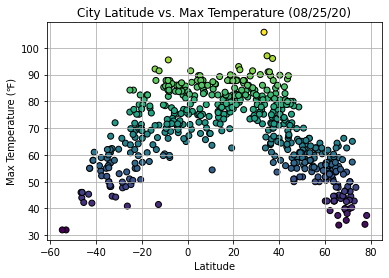

In [17]:
latitude = cities_df.loc[:, "Lat"]
max_temp = cities_df.loc[:, "Max Temp"]

plt.scatter(latitude, max_temp, c=max_temp, cmap="viridis", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (℉)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().strftime('%m/%d/%y')})")
plt.savefig("Resources/assets/images/Fig1.png", dpi=200)
plt.show()

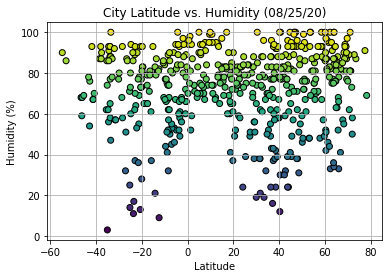

In [18]:
humidity = cities_df.loc[:, "Humidity"]

plt.scatter(latitude, humidity, c=humidity, cmap="viridis", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datetime.now().strftime('%m/%d/%y')})")
plt.savefig("Resources/assets/images/Fig2.png", dpi=200)
plt.show()

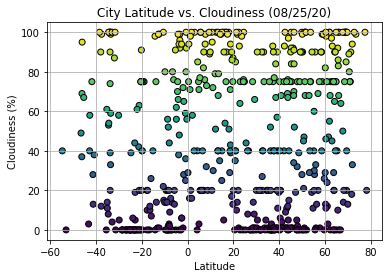

In [19]:
cloudiness = cities_df.loc[:, "Cloudiness"]

plt.scatter(latitude, cloudiness, c=cloudiness, cmap="viridis", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().strftime('%m/%d/%y')})")
plt.savefig("Resources/assets/images/Fig3.png", dpi=200)
plt.show()

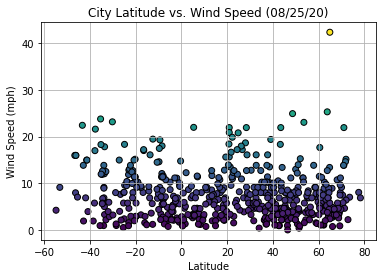

In [20]:
wind_speed = cities_df.loc[:, "Wind Speed"]

plt.scatter(latitude, wind_speed, c=wind_speed, cmap="viridis", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().strftime('%m/%d/%y')})")
plt.savefig("Resources/assets/images/Fig4.png", dpi=200)
plt.show()